In [1]:
#import package

import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
from sklearn import datasets


In [2]:
import matplotlib.pyplot as plt
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go
from scipy.sparse import csc_matrix
from scipy.sparse import csr_matrix

In [3]:
#import metadata
META = pd.read_excel('Strain_data.xlsx', sheetname='Strain info',index_col=0)

In [4]:
META

,NOTES,PATHOTYPE,Source,CD,UC,IBD
Strain,,,,,,
12-1-TI12,AIEC,InPec: AIEC,Terminal Ileum Biopsy,0,0,0
12-2-TI13,Commensal IBD,InPec: non-AIEC,Terminal Ileum Biopsy,0,0,0
18-3-TI5,Commensal IBD,InPec: non-AIEC,Terminal Ileum Biopsy,0,0,0
18-4-TI12,Commensal IBD,InPec: non-AIEC,Terminal Ileum Biopsy,0,0,0
3_2_53FAA,Commensal IBD,InPec: non-AIEC,Faecal,1,0,1
33-1-TI5,AIEC,InPec: AIEC,Terminal Ileum Biopsy,1,0,1
36-1-TI13,Commensal IBD,InPec: non-AIEC,Terminal Ileum Biopsy,1,0,1
39-2-TI18,Commensal IBD,InPec: non-AIEC,Terminal Ileum Biopsy,1,0,1
41-2-TI13,Commensal IBD,InPec: non-AIEC,Terminal Ileum Biopsy,1,0,1


In [5]:
#Create CD UC IBD matrix
META_disease=META.drop("NOTES",axis=1)
META_disease=META_disease.drop("PATHOTYPE",axis=1)
META_disease=META_disease.drop("Source",axis=1)
M_disease=META_disease.as_matrix()
M_disease

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [0, 1, 1],
       [0, 1, 1],
       [0, 0, 0],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0,

In [6]:
#import pan genome matrix
base_matrix = pd.read_excel('BENG 213- Pangenome analysis.xlsx', sheetname='Matrix_w_Genes',index_col=0)

In [7]:
genelist=base_matrix.columns
genelist

Index([u'hypothetical protein', u'hypothetical protein.1', u'Toxin B',
       u'hypothetical protein.2', u'Hemin receptor', u'hypothetical protein.3',
       u'Ribonuclease HI', u'hypothetical protein.4',
       u'Ribosomal RNA large subunit methyltransferase H',
       u'Endoribonuclease YbeY',
       ...
       u'hypothetical protein.9586', u'Nif-specific regulatory protein',
       u'putative RNA polymerase sigma factor FecI.1',
       u'hypothetical protein.9587', u'hypothetical protein.9588',
       u'hypothetical protein.9589', u'hypothetical protein.9590',
       u'Antirestriction protein KlcA.11', u'hypothetical protein.9591',
       u'AIEC'],
      dtype='object', length=16089)

In [8]:
#strains in pan genome matrix
strain_list=[]
for i in base_matrix.index:
    strain_list.append(i)
print len(strain_list)
print strain_list

108
[u'12-1-TI12', u'12-2-TI13', u'18-3-TI5', u'18-4-TI12', u'33-1-TI5', u'36-1-TI13', u'39-2-TI18', u'3_2_53FAA', u'41-2-TI13', u'46-1-TI2', u'52-1-TI13', u'52-2-TI10', u'54-1-TI6', u'55-1-AU4', u'55-1-TI19', u'57-3-TI5', u'60-1-TI1', u'61-1-TI1', u'62-2-TI6', u'63-1-TI1', u'69-1-AU1', u'69-1-TI1', u'70-2-TI12', u'72-6-TI12', u'CD_1IM_3', u'CD_34_LN', u'CD_64_LN', u'E_coli_G58-1', u'E_coli_Nissle_1917', u'Escherichia_coli_042', u'Escherichia_coli_536', u'Escherichia_coli_55989', u'Escherichia_coli_ABU_83972', u'Escherichia_coli_APEC_O1', u'Escherichia_coli_ATCC_8739', u'Escherichia_coli_BL21_AM946981', u'Escherichia_coli_BL21_BL21-GoldpLysS_AG', u'Escherichia_coli_BL21_CP001509', u'Escherichia_coli_BW2952', u'Escherichia_coli_B_str_REL606', u'Escherichia_coli_CFT073', u'Escherichia_coli_DH1', u'Escherichia_coli_DH1_ME8569', u'Escherichia_coli_E24377A', u'Escherichia_coli_ED1a', u'Escherichia_coli_HS', u'Escherichia_coli_IAI1', u'Escherichia_coli_IAI39', u'Escherichia_coli_IHE3034', u'

In [9]:
Num_hyp_prot=0
Non_hyp_prot_list=[]
hyp_prot_list=[]
all_col=[]
for columns in base_matrix.columns:
    all_col.append(columns)
    if columns.find("hypothetical protein")==-1:
        Non_hyp_prot_list.append(columns)
    else:
        Num_hyp_prot=Num_hyp_prot+1
        hyp_prot_list.append(columns)
print Num_hyp_prot

9592


In [10]:
#Separate metadata into separate categories
#Strain list for Metadata
strain_type=META['NOTES']
patho_type=META['PATHOTYPE']
source_type=META['Source']
strains_meta=META.index

In [11]:
strain_type

Strain
12-1-TI12                                  AIEC
12-2-TI13                         Commensal IBD
18-3-TI5                          Commensal IBD
18-4-TI12                         Commensal IBD
3_2_53FAA                         Commensal IBD
33-1-TI5                                   AIEC
36-1-TI13                         Commensal IBD
39-2-TI18                         Commensal IBD
41-2-TI13                         Commensal IBD
46-1-TI2                          Commensal IBD
52-1-TI13                                  AIEC
52-2-TI10                         Commensal IBD
54-1-TI6                          Commensal IBD
55-1-AU4                          Commensal IBD
55-1-TI19                         Commensal IBD
57-3-TI5                                   AIEC
60-1-TI1                                   AIEC
61-1-TI1                                   AIEC
62-2-TI6                          Commensal IBD
63-1-TI1                          Commensal IBD
69-1-AU1                         

In [13]:
#find strains in metadata not in matrix
strains_to_drop=[]
for i in strains_meta:
    if i not in strain_list:
        strains_to_drop.append(i)

In [14]:
#drop strains not in matrix
for i in strains_to_drop:
    if i in strain_type.index:
        strain_type=strain_type.drop(i, axis=0)
    if i in patho_type.index:
        patho_type=patho_type.drop(i, axis=0)
    if i in source_type.index:
        source_type=source_type.drop(i, axis=0)
if len(base_matrix)==len(strain_type):
    print 'Yes'
if len(base_matrix)==len(patho_type):
    print 'Yes'
if len(base_matrix)==len(source_type):
    print 'Yes'

Yes
Yes
Yes


In [15]:
print base_matrix.shape
for i in hyp_prot_list:
    base_matrix=base_matrix.drop(i,axis=1)
print base_matrix.shape

(108, 16089)
(108, 6497)


In [16]:
#Decision Trees 
from random import *


In [17]:
base_sample=base_matrix
base_sample=base_sample.sample(54)
base_sample
strain_sample=base_sample.index
test_strains=[]
for i in strain_sample:
    if i in strain_type.index:
        strain_type=strain_type.drop(i, axis=0)
    if i in patho_type.index:
        patho_type=patho_type.drop(i, axis=0)
    if i in source_type.index:
        source_type=source_type.drop(i, axis=0)
print '%s %s %s' % (strain_type.shape, patho_type.shape, source_type.shape)

(54L,) (54L,) (54L,)


In [18]:
test_strains=[]
for x in strain_list:
    if x not in strain_sample:      
        test_strains.append(x)
print len(test_strains)
54+54        

54


108

In [19]:
test_base=base_matrix.copy()
for i in strain_sample:
    test_base=test_base.drop(i, axis=0)
print test_base.shape

(54, 6497)


In [20]:
def unique(list1):
    unique_list = []
     # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    return unique_list           

In [21]:
strain_types_U=unique(strain_type)
print (len(strain_types_U))
print (strain_types_U)

10
[u'Commensal IBD', u'AIEC', u'Commensal', u'EAEC', u'UPEC', u'ETEC', u'ExPEC', u'EHEC', u'EPEC', u'Shigella']


In [22]:
patho_type_U=unique(patho_type)
print (len(patho_type_U))
print (patho_type_U)

10
[u'InPec: non-AIEC', u'InPec: AIEC', u'Commensal', u'InPec: EAEC', u'ExPec: UPEC', u'InPec: EHEC', u'InPec: EPEC', u'ExPec', u'ExPec: Envisolate', u'Shigella']


In [23]:
source_type_U=unique(source_type)
print (len(source_type_U))
print (source_type_U)

12
[u'Terminal Ileum Biopsy', u'Faecal', u'biopsy', u'intestinal mucosa', u'Urinary', u'fecal', u'Unknown', u'Colon', u'cerebro-spinal fluid', u'Bloodstream', u'ileum', u'colon biopsy']


In [24]:
def countypes(list1,unique):
    
    c2=0
    for i in range(len(unique)):
        c=0
        for x in list1:
            if x==unique[i]:
                c+=1
        print '%s %s' % (unique[i],c)
        c2=c2+c
    print c2

In [25]:
countypes(strain_type, strain_types_U)

Commensal IBD 15
AIEC 8
Commensal 12
EAEC 1
UPEC 3
ETEC 1
ExPEC 3
EHEC 6
EPEC 1
Shigella 4
54


In [26]:
countypes(patho_type, patho_type_U)

InPec: non-AIEC 15
InPec: AIEC 8
Commensal 13
InPec: EAEC 1
ExPec: UPEC 4
InPec: EHEC 6
InPec: EPEC 1
ExPec 1
ExPec: Envisolate 1
Shigella 4
54


In [27]:
countypes(source_type, source_type_U)

Terminal Ileum Biopsy 11
Faecal 6
biopsy 1
intestinal mucosa 2
Urinary 4
fecal 2
Unknown 15
Colon 6
cerebro-spinal fluid 1
Bloodstream 1
ileum 1
colon biopsy 4
54


In [28]:
 from collections import Counter
Counter(strain_type).values()# counts the elements' frequency
len(strain_type)

54

In [30]:
#replace categorical string labels with an integer
def replace(list1,unique):
    list2 = list1.copy()
    c2=0
    for i in range(len(unique)):
        c=0
        for x in list1:
            if x==unique[i]:
                list2=list2.replace(x,i)
                c+=1
        print '%s %s' % (unique[i],c)
        c2=c2+c
    return list2

In [31]:
strain_type_sub=replace(strain_type,strain_types_U)

Commensal IBD 15
AIEC 8
Commensal 12
EAEC 1
UPEC 3
ETEC 1
ExPEC 3
EHEC 6
EPEC 1
Shigella 4


In [32]:
patho_type_sub=replace(patho_type,patho_type_U)

InPec: non-AIEC 15
InPec: AIEC 8
Commensal 13
InPec: EAEC 1
ExPec: UPEC 4
InPec: EHEC 6
InPec: EPEC 1
ExPec 1
ExPec: Envisolate 1
Shigella 4


In [33]:
source_type_sub=replace(source_type,source_type_U)

Terminal Ileum Biopsy 11
Faecal 6
biopsy 1
intestinal mucosa 2
Urinary 4
fecal 2
Unknown 15
Colon 6
cerebro-spinal fluid 1
Bloodstream 1
ileum 1
colon biopsy 4


In [34]:
base=base_sample.as_matrix()
base.shape

(54L, 6497L)

In [35]:
test_base_m=test_base.as_matrix()
test_base_m=csc_matrix(test_base_m, dtype=np.int8).toarray()
test_base_m[0]

array([0, 1, 1, ..., 0, 0, 0], dtype=int8)

In [36]:
#Strain Type Decision Tree 
from sklearn import tree
import graphviz 

clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(base, strain_type_sub )

In [37]:
out=clf1.predict([test_base_m[0]])
strain=test_base.index[0]
print out
print strain_types_U[6]
print "Strain type: %s" % (test_base.index[0])
print "True Type: %s " % (strain_type[strain])

[9]
ExPEC
Strain type: 12-2-TI13
True Type: Commensal IBD 


In [39]:
def decisiontreetest(test_base_matrix,test_base ,type_sub, type_sub_u):
    true_positive=0
    false_positive=0
    true_positive_list=[]
    false_postive_list=[]
    clf1 = tree.DecisionTreeClassifier()
    clf1 = clf1.fit(base, type_sub)
    predicted_matrix=[]
    test_base_matrix=csr_matrix(test_base_matrix, dtype=np.int8).toarray()
    for i in range(len(test_base_matrix)):
        out=clf1.predict([test_base_matrix[i]])
        predicted_matrix.append(out)
        strain=test_base.index[i]
        if out==type_sub[strain]:
            true_positive+=1
            true_positive_list.append(strain)
        else:
            false_positive+=1
            false_postive_list.append(strain)

    accuracy=((float(true_positive)/((float(false_positive)+(float(true_positive))))))
    print '%s' % (type_sub)
    print "Number of True classifications: %s" % (true_positive)
    print "Number of False classifications: %s" % (false_positive)
    print "Accuracy: %s" % (accuracy)

    print false_positive+true_positive
    y = [type_sub]
    x = [predicted_matrix]
    legend = ['Predicted Type', 'True Type']
    plt.hist([x,y],color=['orange', 'green'])
    plt.xlabel("Runs/Delivery")
    plt.ylabel("Frequency")
    plt.legend(legend)
    plt.xticks(range(len(type_sub_u)))
    plt.yticks(range(1, 20))
    plt.show()
    

Strain
12-2-TI13                                 0
18-4-TI12                                 0
3_2_53FAA                                 0
36-1-TI13                                 0
39-2-TI18                                 0
41-2-TI13                                 0
52-2-TI10                                 0
57-3-TI5                                  1
61-1-TI1                                  1
62-2-TI6                                  0
63-1-TI1                                  0
69-1-TI1                                  0
E_coli_Nissle_1917                        2
Escherichia_coli_55989                    3
Escherichia_coli_ABU_83972                4
Escherichia_coli_ATCC_8739                2
Escherichia_coli_BL21_AM946981            2
Escherichia_coli_BL21_CP001509            2
Escherichia_coli_CFT073                   4
Escherichia_coli_DH1_ME8569               2
Escherichia_coli_E24377A                  5
Escherichia_coli_ED1a                     2
Escherichia_coli_IAI1    

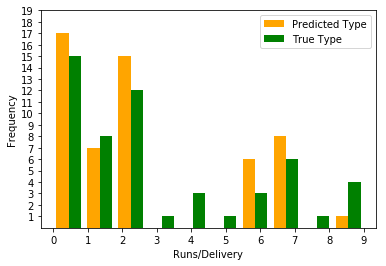

In [40]:
decisiontreetest(test_base_m,test_base,strain_type_sub, strain_types_U)

Strain
12-2-TI13                                 0
18-4-TI12                                 0
3_2_53FAA                                 0
36-1-TI13                                 0
39-2-TI18                                 0
41-2-TI13                                 0
52-2-TI10                                 0
57-3-TI5                                  1
61-1-TI1                                  1
62-2-TI6                                  0
63-1-TI1                                  0
69-1-TI1                                  0
E_coli_Nissle_1917                        2
Escherichia_coli_55989                    3
Escherichia_coli_ABU_83972                4
Escherichia_coli_ATCC_8739                2
Escherichia_coli_BL21_AM946981            2
Escherichia_coli_BL21_CP001509            2
Escherichia_coli_CFT073                   4
Escherichia_coli_DH1_ME8569               2
Escherichia_coli_E24377A                  2
Escherichia_coli_ED1a                     2
Escherichia_coli_IAI1    

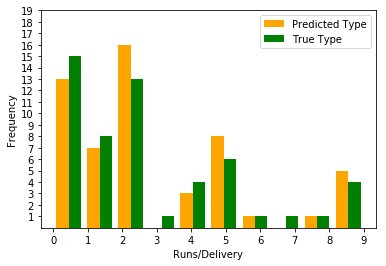

In [42]:
decisiontreetest(test_base_m,test_base,patho_type_sub, patho_type_U)

Strain
12-2-TI13                                  0
18-4-TI12                                  0
3_2_53FAA                                  1
36-1-TI13                                  0
39-2-TI18                                  0
41-2-TI13                                  0
52-2-TI10                                  0
57-3-TI5                                   0
61-1-TI1                                   0
62-2-TI6                                   0
63-1-TI1                                   0
69-1-TI1                                   0
E_coli_Nissle_1917                         2
Escherichia_coli_55989                     3
Escherichia_coli_ABU_83972                 4
Escherichia_coli_ATCC_8739                 5
Escherichia_coli_BL21_AM946981             6
Escherichia_coli_BL21_CP001509             6
Escherichia_coli_CFT073                    4
Escherichia_coli_DH1_ME8569                6
Escherichia_coli_E24377A                   6
Escherichia_coli_ED1a                      5
Esc

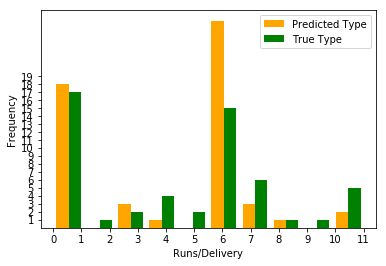

In [43]:
decisiontreetest(test_base_m,test_base, source_type_sub, source_type_U)

In [ ]:
y = [0.148148148148,0.203703703704,0.0555555555556]
x = [1,2,3]
plt.hist([y])
plt.ylabel('Accuracy')
plt.show()
x
y

In [51]:
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(base, strain_type_sub)

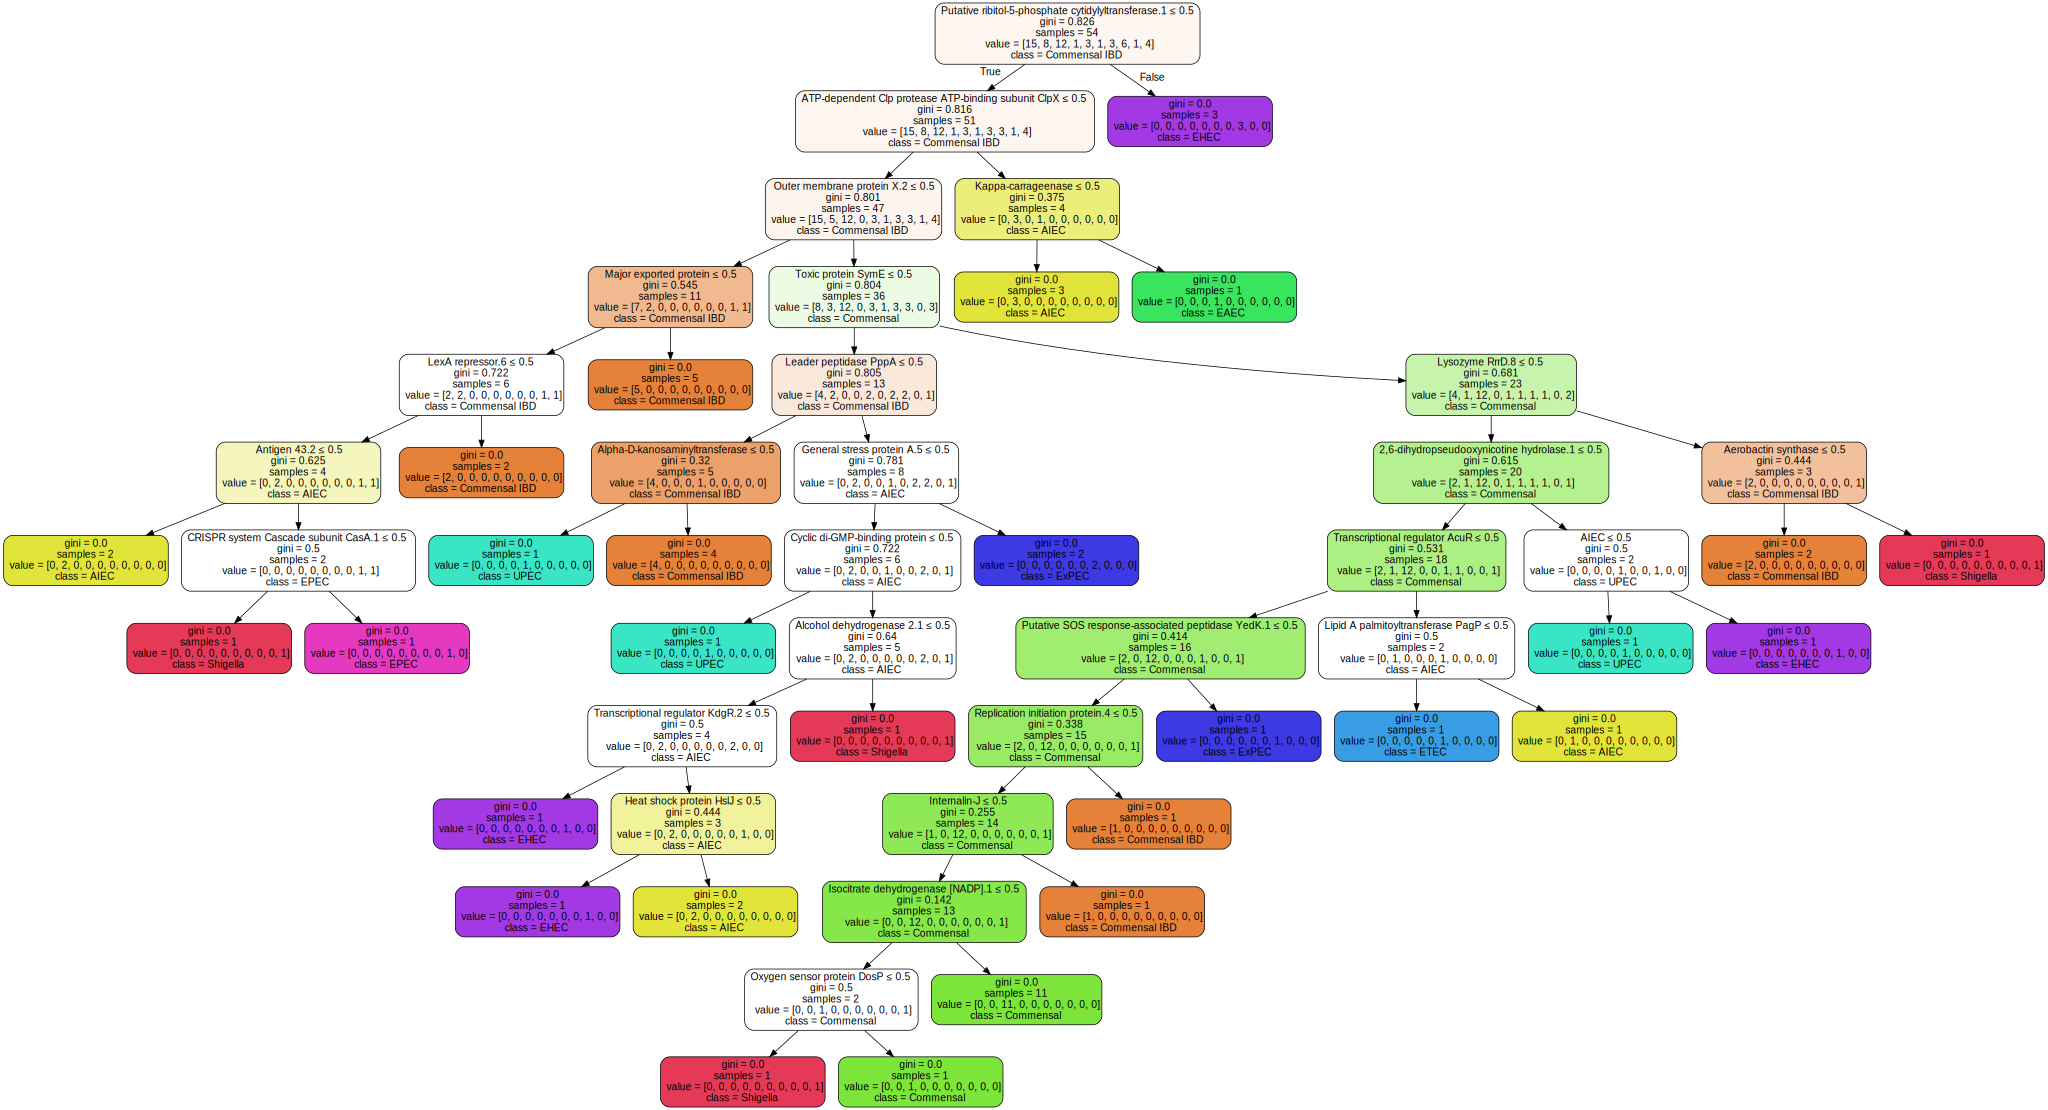

In [52]:
clf1= tree.export_graphviz(clf1, out_file=None,feature_names=Non_hyp_prot_list,  
                         class_names=strain_types_U, 
                         filled=True, rounded=True,  
                         special_characters=True,max_depth=15)  
graph2 = graphviz.Source(clf1)  
graph2.render("Strain Type Decision Tree Max 15 no Hyp Prot")
graph2

In [60]:
#Pathotype Decision Tree 
from sklearn import tree
import graphviz 

clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(base, patho_type_sub )

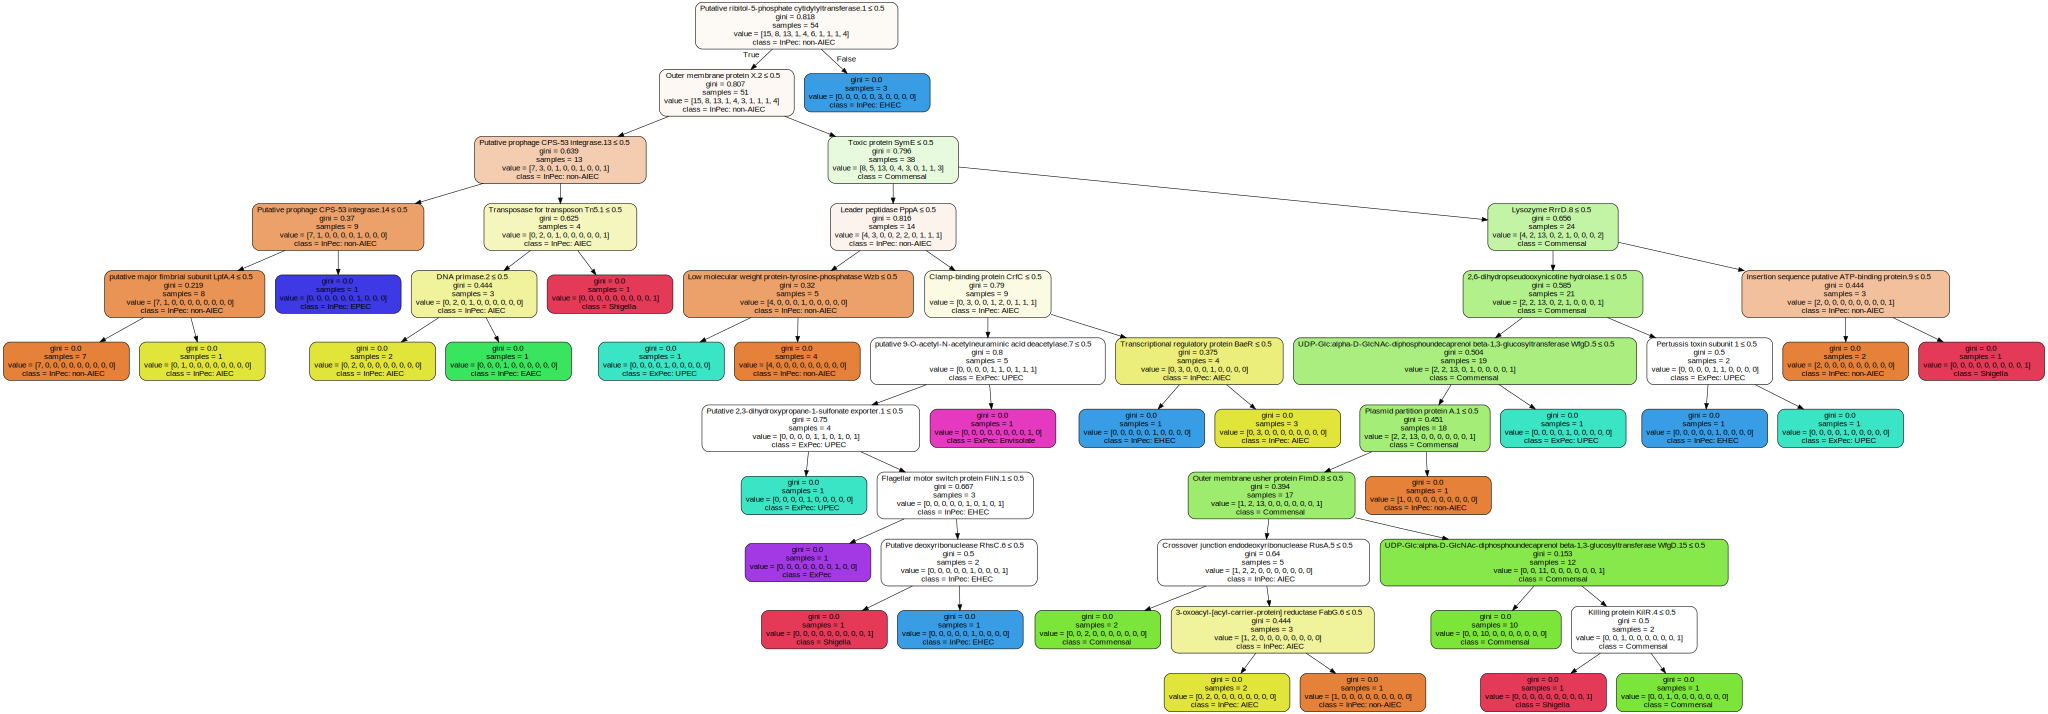

In [61]:
clf1= tree.export_graphviz(clf1, out_file=None,feature_names=Non_hyp_prot_list,  
                         class_names=patho_type_U, 
                         filled=True, rounded=True,  
                         special_characters=True,max_depth=15)  
graph2 = graphviz.Source(clf1)  
graph2.render("Pathotype Decision Tree Max 15 Non Hyp Prot")
graph2

In [62]:
#Source Type Decision Tree 
from sklearn import tree
import graphviz 

clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(base, source_type_sub)

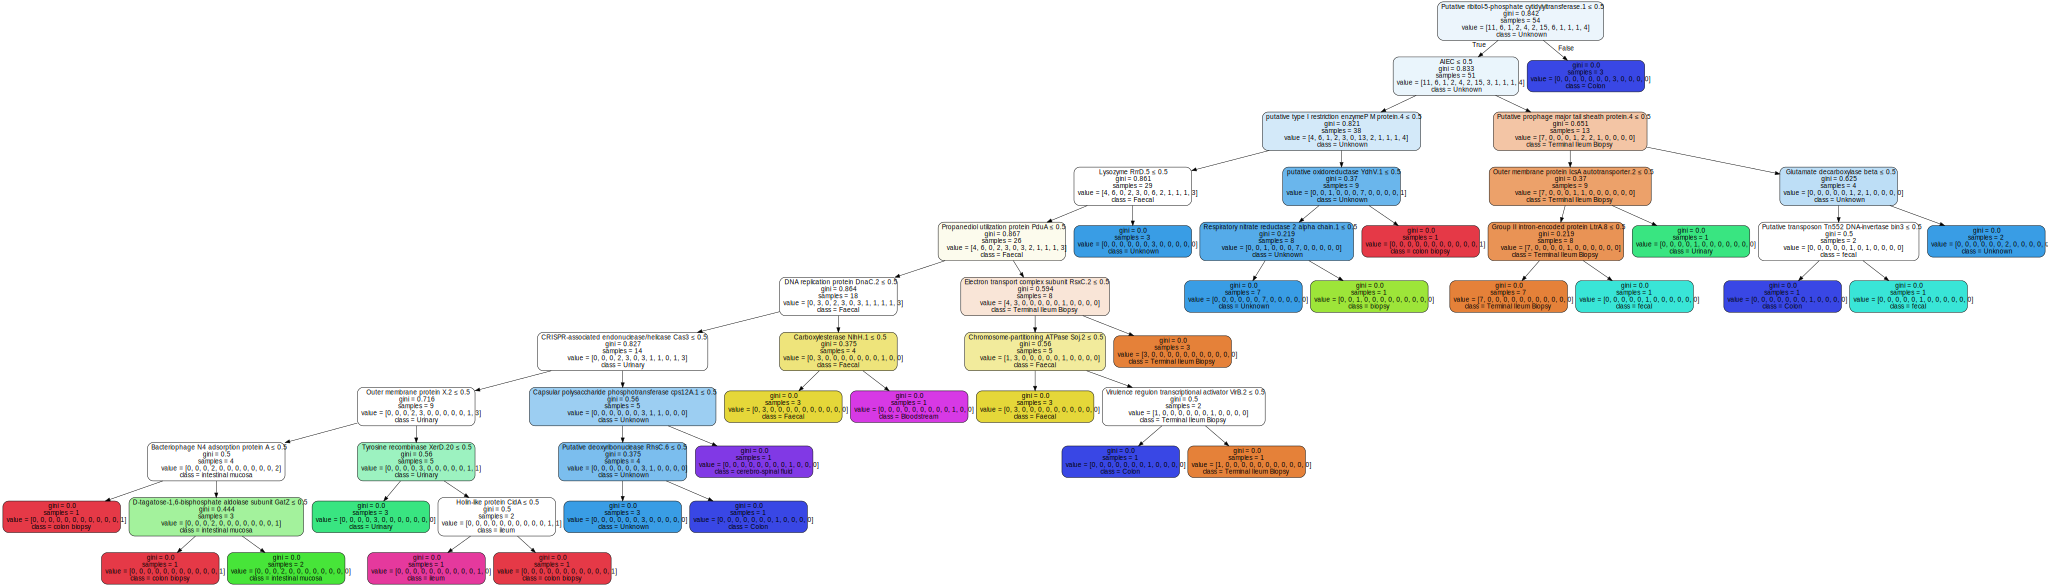

In [63]:
clf1= tree.export_graphviz(clf1, out_file=None,feature_names=Non_hyp_prot_list,  
                         class_names=source_type_U, 
                         filled=True, rounded=True,  
                         special_characters=True,max_depth=10)  
graph2 = graphviz.Source(clf1)  
graph2.render("Source Type Decision Tree Max 10 Non Hyp Prot")
graph2

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

In [ ]:
#HEAT MAP of 'CD','UC','IBD' 
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
uniform_data = np.random.rand(10, 12)
print M_disease

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))       

In [ ]:
  # Sample figsize in inches
ax = sns.heatmap(M_disease,cmap="YlGnBu",linewidths=.001,yticklabels=strain_list,xticklabels=["CD","UC","IBD"])
plt.show()
fig.savefig("output.png") 
